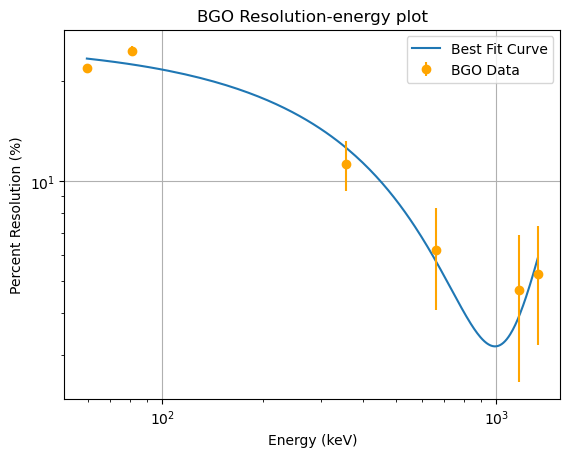

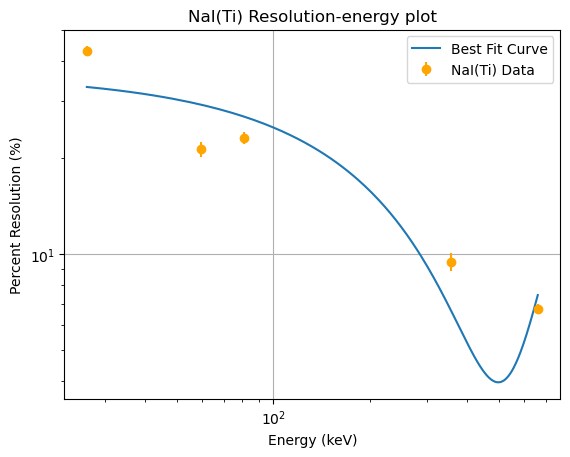

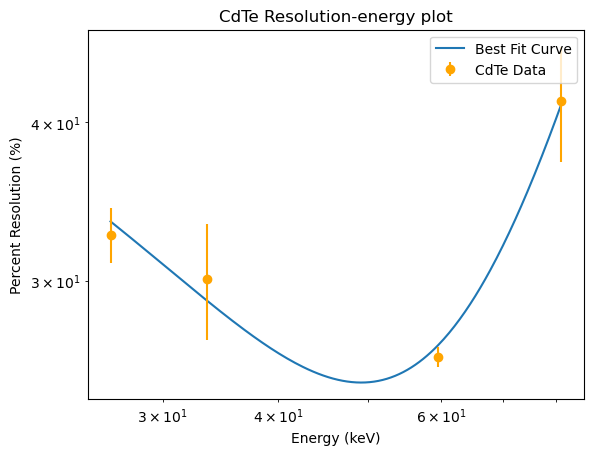

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def line(x, m, c):
    return m * x + c

def respoly(x, a, b, c):
    return a + (b * x) + (c * x**2)

def efflog(x, a, b, c):
    ln_x = np.log(x)
    return a + b * ln_x + c * (ln_x)**2

## Functions
def channelenergyplot(x, y, err, d):

    popt, pcov = curve_fit(line, x, y)
    m, c = popt
    m_err = np.sqrt(pcov[0,0])
    print(f'({m:.2e} +/- {m_err:.2e}) keV/channel')

    plt.plot(x, line(x, *popt), label='Best Fit Line')
    plt.errorbar(x, y, xerr=err, fmt='o', color='r', label=f'{d} Data')  
    plt.xlabel("Channel")
    plt.ylabel("Energy (keV)")
    plt.title(f"{d} Channel-energy Plot")
    plt.minorticks_on()
    plt.grid()
    plt.legend()
    plt.savefig(f'{pfolder}/{d}_channelenergy.png')    
    plt.show()

    
def resolutionplot(x, y, err, d):

    popt, pcov = curve_fit(respoly, x, y)
    a, b, c = popt

    x_fit = np.linspace(min(x), max(x), 200)  
    y_fit = respoly(x_fit, *popt)  
    
    plt.plot(x_fit, y_fit, label='Best Fit Curve')
    plt.errorbar(x, y, yerr=err, fmt='o', color='orange', label=f'{d} Data')  
    plt.xlabel("Energy (keV)")
    plt.ylabel("Percent Resolution (%)")
    plt.title(f"{d} Resolution-energy plot")
    plt.grid()
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.savefig(f'{pfolder}/{d}_resolutionenergy.png')
    plt.show()


def efficiencyplot(x, y, err, d):  
    
    popt, pcov = curve_fit(efflog, x, y)
    a, b, c = popt

    x_fit = np.linspace(min(x), max(x), 200)  
    y_fit = efflog(x_fit, *popt)  
    
    plt.plot(x_fit, y_fit, label='Best Fit Curve')
    plt.errorbar(x, y, yerr=err, fmt='o', color='g', label=f'{d} Data')  
    plt.xlabel("Energy (keV)")
    plt.ylabel("Efficiency (%)")
    plt.title(f"{d} Efficiency-energy Plot")
    plt.minorticks_on()
    #plt.xscale('log')
    #plt.yscale('log')
    plt.grid()
    plt.legend()
    plt.savefig(f'{pfolder}/{d}_efficiencyenergy.png')
    plt.show()


def effangleplot(x, y1, err1, d, y2=None, err2=None):

    popt1, pcov1 = curve_fit(line, x, y1)
    m1, c1 = popt1
    m1_err = np.sqrt(pcov1[0,0])
    print(f'({m1:.2e} +/- {m1_err:.2e}) efficiency/angle (Am)')

    plt.plot(x, line(x, *popt1), color='cornflowerblue', label='Best Fit Line (Am)')    
    plt.errorbar(x, y1, yerr=err1, fmt='o', color='orange', label='Am Data')

    if y2 is not None:
        popt2, pcov2 = curve_fit(line, x, y2)
        m2, c2 = popt2
        m2_err = np.sqrt(pcov2[0,0])
        print(f'({m2:.2e} +/- {m2_err:.2e}) efficiency/angle (Cs)')
        plt.plot(x, line(x, *popt2), color='b' , label='Best Fit Line (Cs)')    
        plt.errorbar(x, y2, yerr=err2, fmt='o', color='violet', label='Cs Data')
            
    plt.xlabel("Angle (degrees)")
    plt.ylabel("Efficiency ratio (Off/On)")
    plt.title(f"{d} Efficiency-Angle Plot")
    plt.minorticks_on()
    plt.grid()
    plt.legend()
    plt.savefig(f'{pfolder}/{d}_effangle.png')    
    plt.show()


# Plot folder
pfolder = f'C:/Users/Danny/Desktop/Group 4/PlotFolder'

### Detector values obtained 
angles = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120])

BGO = {26:59.541, 36:80.997, 173:356.013, 335:661.657, 582:1173.228, 666:1332.492}
BGO_err = [0.03, 0.19, 0.55, 0.07, 1.77, 3.89]
BGO_res = [13, 20, 40, 41, 55, 70]
BGO_res_err = [0.09, 0.60, 6.88, 13.84, 25.92, 27.29]
BGO_abseff = [9.728e-03, 1.671e-02, 9.025e-03, 6.080e-03, 6.917e-03, 4.371e-03]
BGO_abseff_err = [2.447e-05, 2.176e-04, 1.223e-04, 4.073e-05, 3.526e-04, 2.550e-04]
BGO_cseffangle = [4.462e-03, 4.726e-03, 5.224e-03, 5.991e-03, 6.547e-03, 7.320e-03, 8.199e-03, 9.400e-03, 9.369e-03]
BGO_cseffangle_err = [2.500e-05, 2.308e-05, 2.804e-05, 3.598e-05, 3.298e-05, 4.209e-05, 3.269e-05, 3.843e-05, 4.497e-05]
BGO_ameffangle = [9.727e-03, 9.934e-03, 1.098e-02, 1.238e-02, 1.344e-02, 1.418e-02, 1.452e-02, 1.569e-02, 1.468e-02]
BGO_ameffangle_err = [2.006e-05, 3.868e-05, 4.418e-05, 2.984e-05, 2.871e-05, 5.063e-05, 3.793e-05, 3.321e-05, 5.696e-05]


NAI = {19:26.3446, 36:59.541, 49:80.997, 197:356.013, 335:661.657}
NAI_err = [0.13, 0.10, 0.25, 0.74, 2.04]
NAI_res = [11.33, 12.67, 18.68, 33.63, 44.62]
NAI_res_err = [0.41, 0.69, 0.75, 2.17, 1.47]
NAI_abseff = [2.982e-02, 4.246e-03, 1.112e-02, 3.894e-03, 1.444e-03]
NAI_abseff_err = [8.452e-04, 2.001e-04, 2.272e-04, 4.671e-05, 1.052e-05]
NAI_cseffangle = [1.629e-03, 1.611e-03, 1.639e-03, 1.777e-03, 1.916e-03, 2.124e-03, 2.454e-03, 2.786e-03, 3.224e-03]
NAI_cseffangle_err = [1.701e-05, 1.676e-05, 1.587e-05, 1.631e-05, 1.879e-05, 1.910e-05, 2.423e-05, 2.794e-05, 3.162e-05]
NAI_ameffangle = [4.166e-03, 4.044e-03, 3.860e-03, 3.853e-03, 3.980e-03, 4.582e-03, 5.254e-03, 6.248e-03, 6.765e-03]
NAI_ameffangle_err = [1.077e-04, 1.016e-04, 1.122e-04, 1.144e-04, 1.065e-04, 1.034e-04, 9.249e-05, 9.696e-05, 1.008e-04]


CDTE = {279:26.345, 356:33.541, 1185:59.541, 1607:80.997}
CDTE_err = [0.18, 0.45, 0.12, 1.50]
CDTE_res = [8.59, 10.09, 15.54, 33.66]
CDTE_res_err = [0.43, 1.06, 0.28, 3.53]
CDTE_abseff = [2.449e-04, 5.609e-05, 3.808e-05, 3.103e-05]
CDTE_abseff_err = [8.821e-06, 3.328e-06, 8.452e-07, 2.817e-07]
CDTE_ameffangle = [3.752e-05, 3.624e-05, 3.351e-05, 3.114e-05, 2.293e-05, 8.191e-06, 5.505e-06, 5.032e-06, 4.684e-06]
CDTE_ameffangle_err = [9.758e-07, 1.066e-06, 1.063e-06, 7.866e-07, 5.829e-07, 3.529e-07, 4.372e-07, 3.534e-07, 2.885e-07]


# Detector characteristics
a = 0.5         # 2.94cm:BGO, NaI.   0.5cm:CdTe
d = 15 
solidangle = 2*np.pi* (1- d/np.sqrt(d**2 + a**2))

# BGO
bgo_y = np.array(list(BGO.values()))
bgo_x = np.array(list(BGO.keys()))
bgo_err = np.array(BGO_err)
bgores_y = np.array(BGO_res)
bgores_yerr = np.array(BGO_res_err)
bgoabseff_y = np.array(BGO_abseff)
bgoabseff_yerr = np.array(BGO_abseff_err)
bgointeff_y = bgoabseff_y * (4*np.pi / solidangle)
bgointeff_yerr = bgointeff_y * (bgoabseff_yerr / bgoabseff_y)

bgocsabseff_angle = np.array(BGO_cseffangle) / bgoabseff_y[3]
bgocsabseff_angle_err = np.array(BGO_cseffangle_err)
bgoamabseff_angle = np.array(BGO_ameffangle) / bgoabseff_y[0]
bgoamabseff_angle_err = np.array(BGO_ameffangle_err)

resbgo = 100*( bgores_y / bgo_y)
resbgo_err = resbgo * (bgores_yerr / bgores_y)

# NaI(Ti)
nai_y = np.array(list(NAI.values()))
nai_x = np.array(list(NAI.keys()))
nai_err = np.array(NAI_err)
naires_y = np.array(NAI_res)
naires_yerr = np.array(NAI_res_err)
naiabseff_y = np.array(NAI_abseff)
naiabseff_yerr = np.array(NAI_abseff_err)
naiinteff_y = naiabseff_y * (4*np.pi / solidangle)
nai_inteff_yerr = naiinteff_y * (naiabseff_yerr / naiabseff_y)

naicsabseff_angle = np.array(NAI_cseffangle) / naiabseff_y[4]
naicsabseff_angle_err = np.array(NAI_cseffangle_err)
naiamabseff_angle = np.array(NAI_ameffangle) / naiabseff_y[1]
naiamabseff_angle_err = np.array(NAI_ameffangle_err)

resnai = 100*(naires_y / nai_y)
resnai_err = resnai * (naires_yerr / naires_y)

# CdTe
cdte_y = np.array(list(CDTE.values()))
cdte_x = np.array(list(CDTE.keys()))
cdte_err = np.array(CDTE_err)
cdteres_y = np.array(CDTE_res)
cdteres_yerr = np.array(CDTE_res_err)
cdteabseff_y = np.array(CDTE_abseff)
cdteabseff_yerr = np.array(CDTE_abseff_err)
cdteinteff_y = cdteabseff_y * (4*np.pi / solidangle)
cdte_inteff_yerr = cdteinteff_y * (cdteabseff_yerr / cdteabseff_y)

cdteamabseff_angle = np.array(CDTE_ameffangle) / cdteabseff_y[2]
cdteamabseff_angle_err = np.array(CDTE_ameffangle_err)

rescdte = 100*(cdteres_y / cdte_y)
rescdte_err = rescdte * (cdteres_yerr / cdteres_y)


## Plots              
#channelenergyplot(bgo_x, bgo_y, bgo_err, 'BGO')
#channelenergyplot(nai_x, nai_y, nai_err, 'NaI(Ti)')
#channelenergyplot(cdte_x, cdte_y, cdte_err, 'CdTe')

#resolutionplot(bgo_y, resbgo, resbgo_err, 'BGO')
#resolutionplot(nai_y, resnai, resnai_err, 'NaI(Ti)')
#resolutionplot(cdte_y, rescdte, rescdte_err, 'CdTe')

#efficiencyplot(bgo_y, bgointeff_y, bgo_inteff_yerr, 'BGO')
#efficiencyplot(nai_y, naiinteff_y, nai_inteff_yerr, 'NaI(Ti)')
#efficiencyplot(cdte_y, cdteinteff_y, cdte_inteff_yerr, 'CdTe')

#effangleplot(angles, bgoamabseff_angle, bgoamabseff_angle_err, 'BGO', bgocsabseff_angle, bgocsabseff_angle_err)
#effangleplot(angles, naiamabseff_angle, naiamabseff_angle_err, 'NaI(Ti)', naicsabseff_angle, naicsabseff_angle_err)
#effangleplot(angles, cdteamabseff_angle, cdteamabseff_angle_err, 'CdTe')